In [159]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')

from src.general import *
from src.eda import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
config = configure_defaults()
config['testing_data'] = 'union_patches'
# config['testing_data'] = 'mexico_all'

show(config)

,0
n_species,16
min_species,2
species_order,abundance
training_data,petrer_limestone
testing_data,union_patches
training_start,train_from_scratch
val_split,0.5
reconstruction_loss,bce
depth,32
n_latent,16


In [142]:
species_origin = get_species(config['training_data'])
species_origin

Index(['Fumana thymifolia', 'Stipa tenacissima', 'Helianthemum violaceum',
       'Brachypodium retusum', 'Fumana ericoides', 'Rosmarinus officinalis',
       'Helianthemum syriacum', 'Teucrium capitatum', 'Atractylis cancellata',
       'Teucrium pseudochamaepitys', 'Phagnalon rupestre', 'Teucrium mola',
       'Fumana hispidula', 'Sedum sediforme', 'Matthiola fruticulosa',
       'Thymus vulgaris'],
      dtype='object')

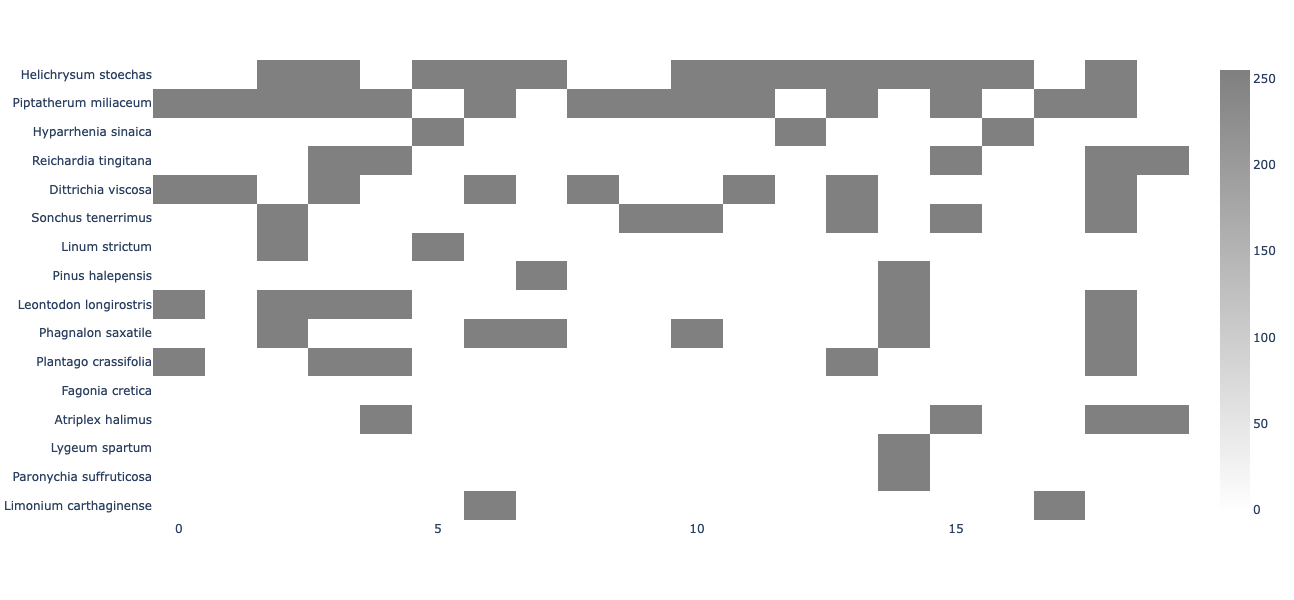

In [157]:
patches = get_patches(config)
patches.sample(n=20).reset_index(drop=True).T.plot(**{'kind' : 'imshow', 'aspect' : 'auto', 'color_continuous_scale' : [(0,"white"), (1,'grey')], 'height' : 600})

In [144]:
species_target = get_species(config['testing_data'])
species_target

Index(['Helichrysum stoechas', 'Piptatherum miliaceum', 'Hyparrhenia sinaica',
       'Reichardia tingitana', 'Dittrichia viscosa', 'Sonchus tenerrimus',
       'Linum strictum', 'Pinus halepensis', 'Leontodon longirostris',
       'Phagnalon saxatile', 'Plantago crassifolia', 'Fagonia cretica',
       'Atriplex halimus', 'Lygeum spartum', 'Paronychia suffruticosa',
       'Limonium carthaginense'],
      dtype='object')

In [145]:
paths

{'data': PosixPath('/Users/johannes/work/resecarin/data/phylo_mexico_all_chunk_size=16'),
 'outputs': PosixPath('/Users/johannes/work/resecarin/outputs/phylo_mexico_all_chunk_size=16'),
 'figures': PosixPath('/Users/johannes/work/resecarin/figures/phylo_mexico_all_chunk_size=16'),
 'models': PosixPath('/Users/johannes/work/resecarin/models/phylo_mexico_all_chunk_size=16')}

In [146]:
paths = set_paths(config['testing_data'])
csvs = [p for p in paths['data'].glob('phy*.csv')]
csvs


[PosixPath('/Users/johannes/work/resecarin/data/union_patches/phydist.csv')]

In [147]:
csv = csvs[0]
phylo = pd.read_csv(csv, index_col = 0).pipe(clean_names)
phylo.index = phylo.index.str.replace('_', ' ')

phylo

,Jasonia glutinosa,Aetheorhiza bulbosa,Helichrysum stoechas,Filago fuscescens,Bombycilaena erecta,Filago gallica,Phagnalon saxatile,Phagnalon rupestre,Dittrichia viscosa,Pallenis spinosa,...,Stipa tenacissima,Lygeum spartum,Carex humilis,Juncus acutus,Chamaerops humilis,Juniperus phoenicea,Juniperus oxycedrus,Tetraclinis articulata,Pinus halepensis,Ephedra fragilis
Jasonia glutinosa,0.000000,90.519268,90.519269,90.519269,90.519269,90.519269,90.519269,90.519269,90.519269,90.519269,...,271.516129,271.516129,271.516128,271.516129,271.516129,650.100055,650.100055,650.100055,650.100055,650.100055
Aetheorhiza bulbosa,90.519268,0.000000,90.519269,90.519269,90.519269,90.519269,90.519269,90.519269,90.519269,90.519269,...,271.516129,271.516129,271.516128,271.516129,271.516129,650.100055,650.100055,650.100055,650.100055,650.100055
Helichrysum stoechas,90.519269,90.519269,0.000000,13.516502,13.516502,13.516502,27.369892,27.369892,44.199414,44.199414,...,271.516130,271.516130,271.516129,271.516130,271.516130,650.100056,650.100056,650.100056,650.100056,650.100056
Filago fuscescens,90.519269,90.519269,13.516502,0.000000,5.834124,7.725148,27.369892,27.369892,44.199414,44.199414,...,271.516130,271.516130,271.516129,271.516130,271.516130,650.100056,650.100056,650.100056,650.100056,650.100056
Bombycilaena erecta,90.519269,90.519269,13.516502,5.834124,0.000000,7.725148,27.369892,27.369892,44.199414,44.199414,...,271.516130,271.516130,271.516129,271.516130,271.516130,650.100056,650.100056,650.100056,650.100056,650.100056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Juniperus phoenicea,650.100055,650.100055,650.100056,650.100056,650.100056,650.100056,650.100056,650.100056,650.100056,650.100056,...,650.100056,650.100056,650.100055,650.100056,650.100056,0.000000,10.072960,40.753274,253.645516,541.715216
Juniperus oxycedrus,650.100055,650.100055,650.100056,650.100056,650.100056,650.100056,650.100056,650.100056,650.100056,650.100056,...,650.100056,650.100056,650.100055,650.100056,650.100056,10.072960,0.000000,40.753274,253.645516,541.715216
Tetraclinis articulata,650.100055,650.100055,650.100056,650.100056,650.100056,650.100056,650.100056,650.100056,650.100056,650.100056,...,650.100056,650.100056,650.100055,650.100056,650.100056,40.753274,40.753274,0.000000,253.645516,541.715216
Pinus halepensis,650.100055,650.100055,650.100056,650.100056,650.100056,650.100056,650.100056,650.100056,650.100056,650.100056,...,650.100056,650.100056,650.100055,650.100056,650.100056,253.645516,253.645516,253.645516,0.000000,541.715216


In [148]:
phylo.columns[phylo.columns.str.startswith('Teucrium')]

Index(['Teucrium libanitis', 'Teucrium carolipaui', 'Teucrium carthaginense',
       'Teucrium capitatum', 'Teucrium pseudochamaepitys'],
      dtype='object')

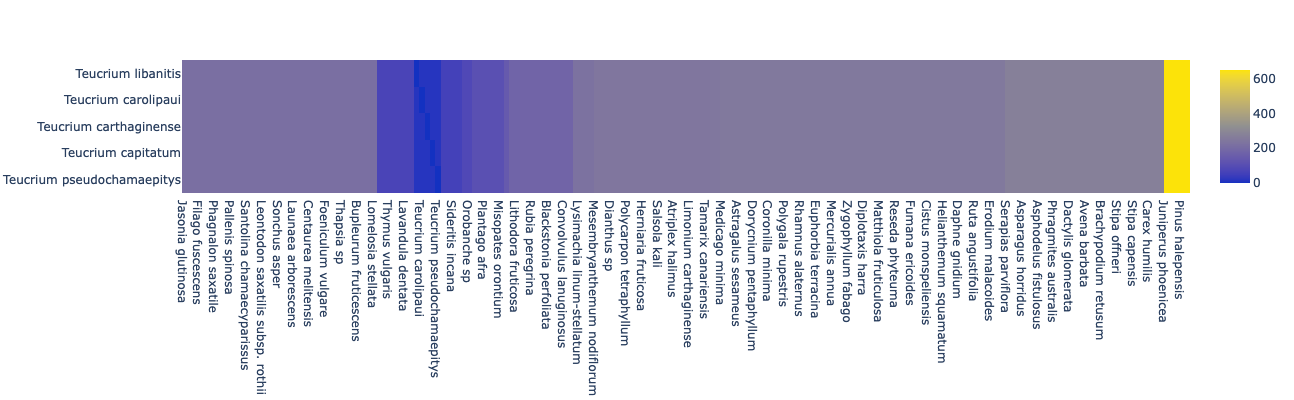

In [149]:
phylo.loc[_, :].plot(kind='imshow', aspect='auto')

In [94]:
species_target

Index(['Bouteloa gracilis', 'Neobuxbaumia mezcalaensis', 'Lippia graveolens',
       'Yucca periculosa', 'Calliandra eriophylla', 'Aeschinomene compacta',
       'Echinopterix eglandulosa', 'Ruelia', 'Ipomea sp',
       'Lantana achirantifolia', 'Justicia mexicana',
       'Ruelia hirsutoglandulosa', 'Cnidosculus tehuacanensis',
       'Opuntia decumbens', 'Hechtia', 'Hibiscus'],
      dtype='object')

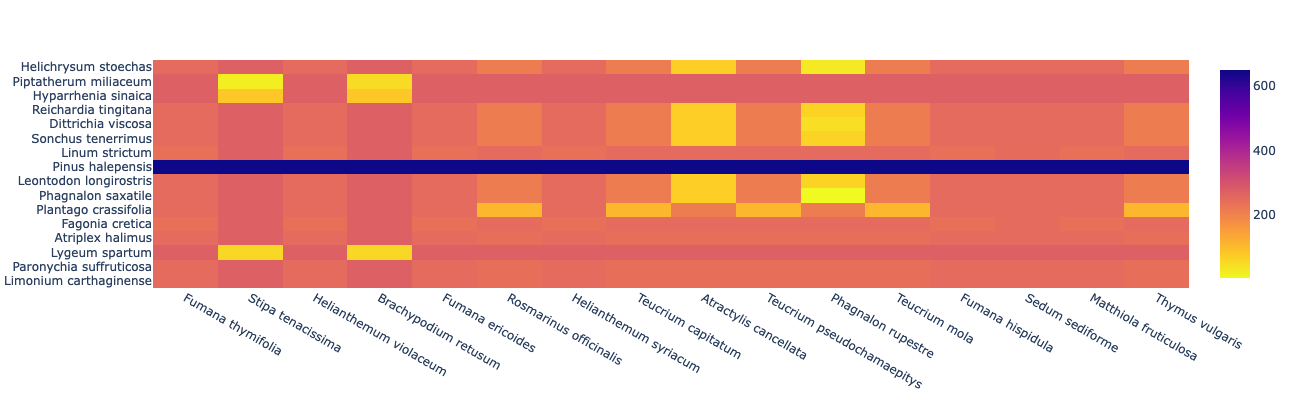

In [151]:
phylo = phylo.pipe(use_proxy_species, {'Teucrium mola' : 'Teucrium carolipaui'})
if config['testing_data'] == 'union_patches':
    phylo = phylo.pipe(use_proxy_species, {'Hyparrhenia sinaica': 'Hyparrhenia hirta',
                                           'Plantago crassifolia': 'Plantago albicans',
                                           'Leontodon longirostris' : 'Leontodon saxatilis subsp. rothii'})
elif config['testing_data'] == 'mexico_all':
    phylo = phylo.pipe(use_proxy_species, {'Bouteloa gracilis' : 'Bouteloua gracilis',
                                          'Aeschinomene compacta' : 'Aeschynomene compacta',
                                          'Echinopterix eglandulosa' : 'Echinopterys eglandulosa',
                                           'Ruelia' : 'Ruellia lutea',
                                           'Ipomea sp' : 'Ipomoea sp',
                                           'Lantana achirantifolia' : 'Lantana achyranthifolia',
                                           'Hechtia' : 'Hechtia podantha',
                                           'Hibiscus' : 'Hibiscus elegans'
                                          })
        
subset_phylo(phylo, species_origin, species_target).plot(**heatmap, color_continuous_scale = 'plasma_r')

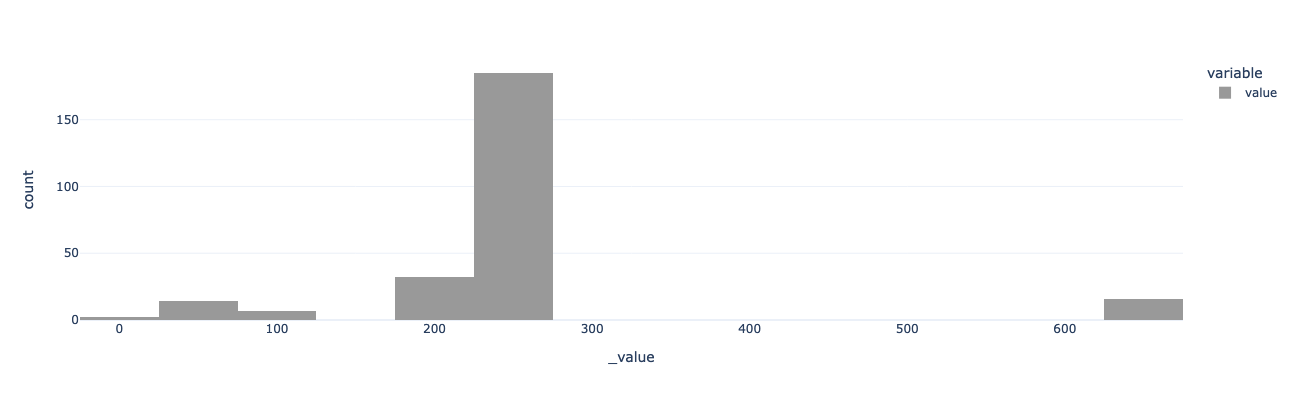

In [160]:
subset_phylo(phylo, species_origin, species_target).melt().value.plot.hist()

In [78]:
# phylo.pipe(export_patches, paths=paths, file_name= 'phylo_petrer_limestone_union_patches.csv', index=True)#

In [132]:
paths = set_paths('transfer')
species_origin = get_species(config['training_data'])
print(species_origin)
species_target = get_species(config['testing_data'])
print(species_target)
dictionary = build_dictionary(config, phylo, species_origin, species_target, chunk_size = 16)
dictionary

Index(['Fumana thymifolia', 'Stipa tenacissima', 'Helianthemum violaceum',
       'Brachypodium retusum', 'Fumana ericoides', 'Rosmarinus officinalis',
       'Helianthemum syriacum', 'Teucrium capitatum', 'Atractylis cancellata',
       'Teucrium pseudochamaepitys', 'Phagnalon rupestre', 'Teucrium mola',
       'Fumana hispidula', 'Sedum sediforme', 'Matthiola fruticulosa',
       'Thymus vulgaris'],
      dtype='object')
Index(['Bouteloa gracilis', 'Neobuxbaumia mezcalaensis', 'Lippia graveolens',
       'Yucca periculosa', 'Calliandra eriophylla', 'Aeschinomene compacta',
       'Echinopterix eglandulosa', 'Ruelia', 'Ipomea sp',
       'Lantana achirantifolia', 'Justicia mexicana',
       'Ruelia hirsutoglandulosa', 'Cnidosculus tehuacanensis',
       'Opuntia decumbens', 'Hechtia', 'Hibiscus'],
      dtype='object')


{'Fumana thymifolia': 'Bouteloa gracilis',
 'Stipa tenacissima': 'Neobuxbaumia mezcalaensis',
 'Helianthemum violaceum': 'Lippia graveolens',
 'Brachypodium retusum': 'Yucca periculosa',
 'Fumana ericoides': 'Calliandra eriophylla',
 'Rosmarinus officinalis': 'Aeschinomene compacta',
 'Helianthemum syriacum': 'Echinopterix eglandulosa',
 'Teucrium capitatum': 'Ruelia',
 'Atractylis cancellata': 'Ipomea sp',
 'Teucrium pseudochamaepitys': 'Lantana achirantifolia',
 'Phagnalon rupestre': 'Justicia mexicana',
 'Teucrium mola': 'Ruelia hirsutoglandulosa',
 'Fumana hispidula': 'Cnidosculus tehuacanensis',
 'Sedum sediforme': 'Opuntia decumbens',
 'Matthiola fruticulosa': 'Hechtia',
 'Thymus vulgaris': 'Hibiscus'}

In [133]:
rev = pd.DataFrame([dictionary]).T
rev.columns = ['target']
rev = rev.reset_index(names = 'petrer')
rev

,petrer,target
0,Fumana thymifolia,Bouteloa gracilis
1,Stipa tenacissima,Neobuxbaumia mezcalaensis
2,Helianthemum violaceum,Lippia graveolens
3,Brachypodium retusum,Yucca periculosa
4,Fumana ericoides,Calliandra eriophylla
5,Rosmarinus officinalis,Aeschinomene compacta
6,Helianthemum syriacum,Echinopterix eglandulosa
7,Teucrium capitatum,Ruelia
8,Atractylis cancellata,Ipomea sp
9,Teucrium pseudochamaepitys,Lantana achirantifolia


In [134]:
dictionary = build_dictionary(config, phylo, species_origin, species_target, chunk_size = 16)
dictionary.values()

dict_values(['Bouteloa gracilis', 'Neobuxbaumia mezcalaensis', 'Lippia graveolens', 'Yucca periculosa', 'Calliandra eriophylla', 'Aeschinomene compacta', 'Echinopterix eglandulosa', 'Ruelia', 'Ipomea sp', 'Lantana achirantifolia', 'Justicia mexicana', 'Ruelia hirsutoglandulosa', 'Cnidosculus tehuacanensis', 'Opuntia decumbens', 'Hechtia', 'Hibiscus'])

In [135]:
testing_patches = get_patches(config, data='testing_data').pipe(clean_names)
testing_patches[list(dictionary.values())]

,Bouteloa gracilis,Neobuxbaumia mezcalaensis,Lippia graveolens,Yucca periculosa,Calliandra eriophylla,Aeschinomene compacta,Echinopterix eglandulosa,Ruelia,Ipomea sp,Lantana achirantifolia,Justicia mexicana,Ruelia hirsutoglandulosa,Cnidosculus tehuacanensis,Opuntia decumbens,Hechtia,Hibiscus
0,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,True
4,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,True,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False
888,True,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False
889,True,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False
890,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False


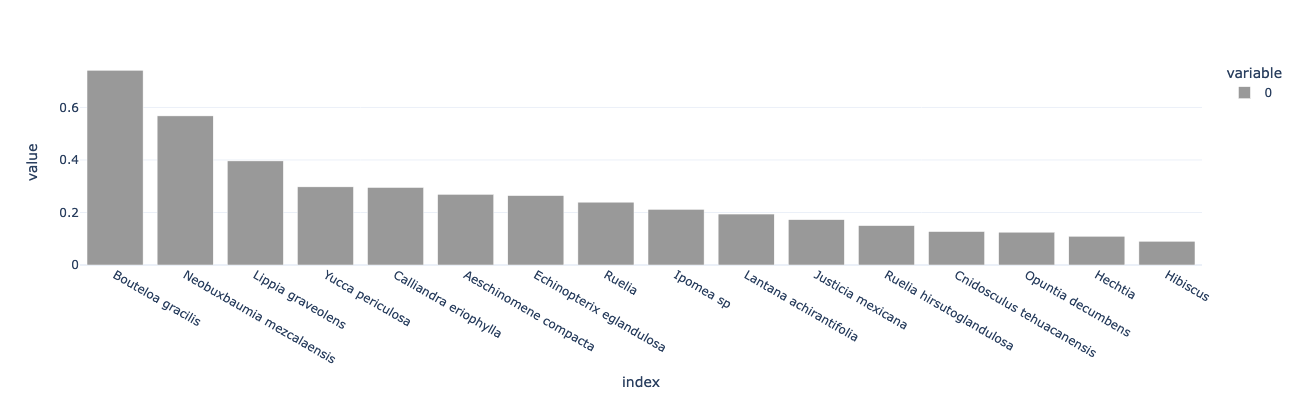

In [136]:
testing_patches.mean().plot.bar()

In [137]:
training_patches = get_patches(config, data='training_data').pipe(clean_names)
training_patches

,Fumana thymifolia,Stipa tenacissima,Helianthemum violaceum,Brachypodium retusum,Fumana ericoides,Rosmarinus officinalis,Helianthemum syriacum,Teucrium capitatum,Atractylis cancellata,Teucrium pseudochamaepitys,Phagnalon rupestre,Teucrium mola,Fumana hispidula,Sedum sediforme,Matthiola fruticulosa,Thymus vulgaris
0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,True,True,False,True,False,False,True,True,True,False,False,False,False,False,False,False
4,True,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,True,True,True,True,False,False,False,True,False,False,True,False,False,True,True,False
2126,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2127,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2128,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [138]:
testing_patches


,Bouteloa gracilis,Neobuxbaumia mezcalaensis,Lippia graveolens,Yucca periculosa,Calliandra eriophylla,Aeschinomene compacta,Echinopterix eglandulosa,Ruelia,Ipomea sp,Lantana achirantifolia,Justicia mexicana,Ruelia hirsutoglandulosa,Cnidosculus tehuacanensis,Opuntia decumbens,Hechtia,Hibiscus
0,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False
1,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,True,True,True,False,False,False,False,False,False,False,False,False,True,False,False,True
4,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,True,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False
888,True,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False
889,True,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False
890,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False


In [139]:
paths

{'data': PosixPath('/Users/johannes/work/resecarin/data/transfer'),
 'outputs': PosixPath('/Users/johannes/work/resecarin/outputs/transfer'),
 'figures': PosixPath('/Users/johannes/work/resecarin/figures/transfer'),
 'models': PosixPath('/Users/johannes/work/resecarin/models/transfer')}

In [140]:
for chunk_size in range(0,17):
    dictionary = build_dictionary(config, phylo, species_origin, species_target, chunk_size = chunk_size)
    paths = set_paths('phylo_' + config['testing_data'] + '_chunk_size='+str(chunk_size))
    out_csv = testing_patches[list(dictionary.values())].to_csv(paths['outputs'] / (config['testing_data'] + '_matched_to_' + config['training_data'] +'_chunk_size=' +str(chunk_size )+ '.csv'), index=False)
    # pd.read_csv(out_csv)

In [123]:
# out_csv = launion_by_phylo.pipe(export_patches, paths, 'phylo_' + data_loc_2 + data_tag_2 + '_matched_to_' + data_loc_1 + data_tag_1 + '.csv')


NameError: name 'launion_by_phylo' is not defined

In [124]:
pd.read_csv(out_csv)


ValueError: Invalid file path or buffer object type: <class 'NoneType'>